In [8]:
import pandas as pd

df_P_tiktok = pd.read_csv('palestine_tiktok.csv')
df_P_tiktok = df_P_tiktok[['hashtags/0/name', 'diggCount', 'createTimeISO', 'shareCount', 'commentCount', 'webVideoUrl']]
df_P_tiktok = df_P_tiktok.dropna()
df_P_tiktok = df_P_tiktok[df_P_tiktok['diggCount'] > 100000]

C:\Users\sammi\AppData\Local\Temp\ipykernel_49752\2628239353.py:3: DtypeWarning: Columns (72,80,83,84,96,104,107,112,115,119,120,124,144,172,180,184,187,188,191,192,199,207,212,231,251,256,259,263,264,267,271,272,275,291,299,304,315,319,327,332,335,339,359,363,367,371,375,376,379,387,391,403,407,412,415,443,444,447,452,455,460,463,467,483,507,551,567,611,627,644,647,715,732,735,763,770,774,778,782,786,790,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926) have mixed types. Specify dtype option on import or set low_memory=False.
  df_P_tiktok = pd.read_csv('palestine_tiktok.csv')


In [9]:
df_BLM_tiktok = pd.read_csv('blm_tiktok.csv')
df_BLM_tiktok = df_BLM_tiktok[['hashtags/0/name', 'diggCount', 'createTimeISO', 'shareCount', 'commentCount', 'webVideoUrl']]
df_BLM_tiktok = df_BLM_tiktok.dropna()
df_BLM_tiktok = df_BLM_tiktok[df_BLM_tiktok['diggCount'] > 100000]

C:\Users\sammi\AppData\Local\Temp\ipykernel_49752\4136759278.py:1: DtypeWarning: Columns (98,102,106,110,114,117,122,125,129,130,134,137,142,153,165,174,177,181,190,193,198,205,213,217,229,234,237,240,244,248,252,256,260,264,268,269,270,272,273,276,280,284,288,292,296,300,302,304,305,308,312,316,318,320,321,324,328,332,336,340,342,344,345,348,352,356,360,364,368,369,372,376,380,384,388,392,396,400,404,408,412,416,420,424,425,428,432,436,437,440,444,448,449,452,456,460,461,464,468,472,476,480,484,488,489,492,496,497,500,501,504,508,512,513,516,517,520,521,524,525,528,530,532,533,536,537,538,540,541,544,545,548,549,552,553,554,556,557,560,561,562,564,565,568,569,572,573,576,577,580,581,584,585,588,592,596,600,601,604,608,609,612,616,617,620,624,628,632,636,640,644,648,650,652,653,656,660,664,668,672,674,676,677,680,684,688,692,696,700,704,708,712,716,720,721,724,728,732,736,738,740,741,744,748,752,756,760,764,768,769,772) have mixed types. Specify dtype option on import or set low_memory

In [10]:
df_P_insta = pd.read_csv('palestine_insta.csv')
df_P_insta = df_P_insta[['hashtags/0', 'url', 'likesCount', 'commentsCount', 'timestamp']]
df_P_insta = df_P_insta.dropna()
df_P_insta = df_P_insta[df_P_insta['likesCount'] > 0]

In [11]:
df_BLM_insta = pd.read_csv('blm_insta.csv')
df_BLM_insta = df_BLM_insta[['hashtags/0', 'url', 'likesCount', 'commentsCount', 'timestamp']]
df_BLM_insta = df_BLM_insta.dropna()
df_BLM_insta = df_BLM_insta[df_BLM_insta['likesCount'] > 0]

### Examining trends in hashtag usage over the last few years/ Examining associations between numerical variables

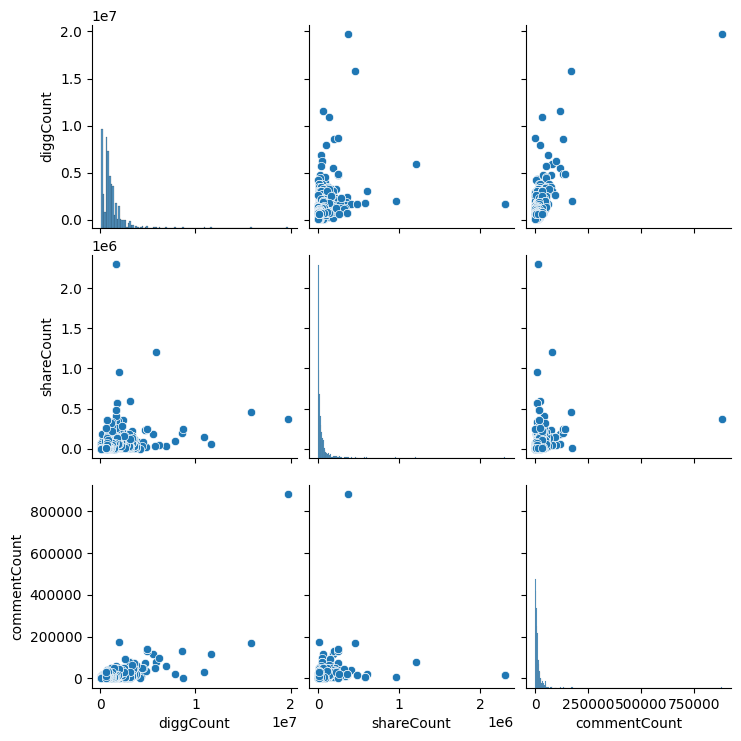

In [12]:
import seaborn as sns
sns.pairplot(data=df_BLM_tiktok[['diggCount', 'shareCount', 'commentCount']])

In [13]:
(df_BLM_tiktok[['diggCount', 'shareCount', 'commentCount']]).corr()

,diggCount,shareCount,commentCount
diggCount,1.000000,0.263034,0.693141
shareCount,0.263034,1.000000,0.196745
commentCount,0.693141,0.196745,1.000000


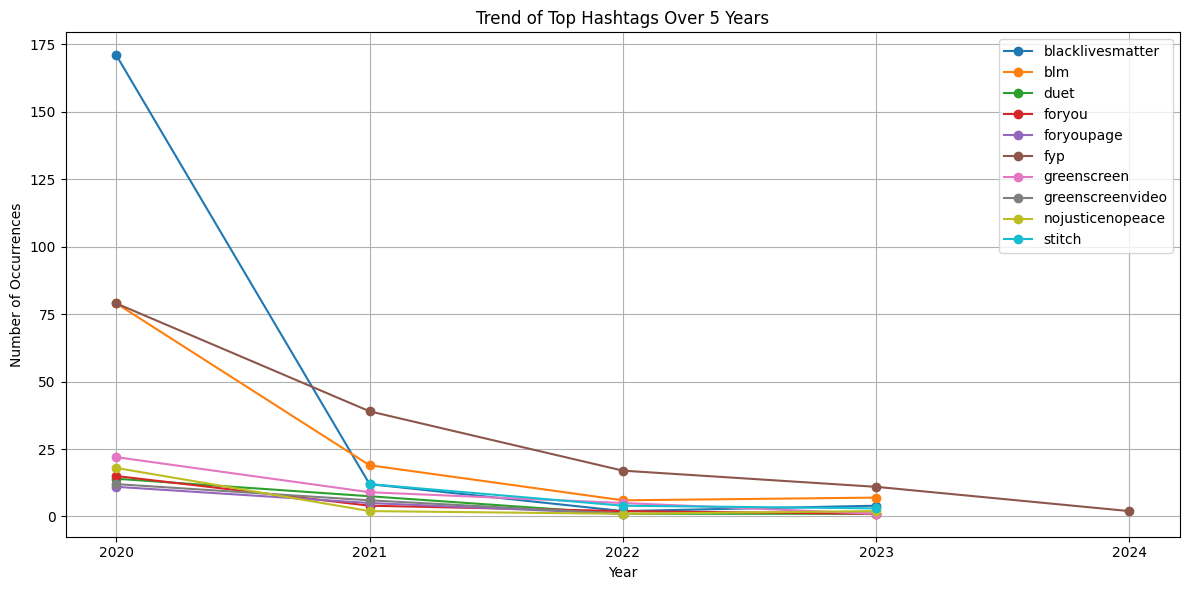

In [14]:
import matplotlib.pyplot as plt
def shorten_name(name):
    return name[:4]

df_BLM_tiktok['createTimeISO'] = df_BLM_tiktok['createTimeISO'].apply(shorten_name)

BLM_tiktok_grouped = df_BLM_tiktok.groupby(['createTimeISO', 'hashtags/0/name']).size().reset_index(name='count')

top_BLM_hashtags = BLM_tiktok_grouped.groupby('hashtags/0/name')['count'].sum().nlargest(10).index
df_top_BLM_hashtags = BLM_tiktok_grouped[BLM_tiktok_grouped['hashtags/0/name'].isin(top_BLM_hashtags)]

plt.figure(figsize=(12, 6))
for hashtag in df_top_BLM_hashtags['hashtags/0/name'].unique():
    plt.plot(df_top_BLM_hashtags[df_top_BLM_hashtags['hashtags/0/name'] == hashtag]['createTimeISO'],
             df_top_BLM_hashtags[df_top_BLM_hashtags['hashtags/0/name'] == hashtag]['count'],
             marker='o', label=hashtag)

plt.title('Trend of Top Hashtags Over 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.xticks(df_top_BLM_hashtags['createTimeISO'].unique())  
plt.tight_layout()  
plt.show()

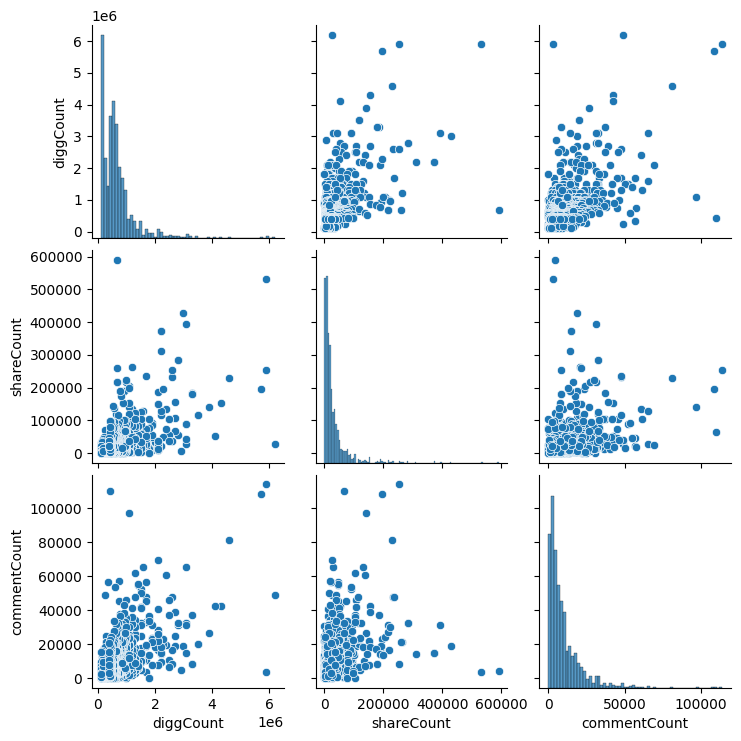

In [15]:
sns.pairplot(data=df_P_tiktok[['diggCount','shareCount', 'commentCount']])

In [16]:
(df_P_tiktok[['diggCount', 'shareCount', 'commentCount']]).corr()

,diggCount,shareCount,commentCount
diggCount,1.000000,0.548939,0.574017
shareCount,0.548939,1.000000,0.395100
commentCount,0.574017,0.395100,1.000000


C:\Users\sammi\AppData\Local\Temp\ipykernel_49752\2947289540.py:25: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  plt.tight_layout()
C:\Users\sammi\AppData\Local\Temp\ipykernel_49752\2947289540.py:25: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  plt.tight_layout()
C:\Users\sammi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sammi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


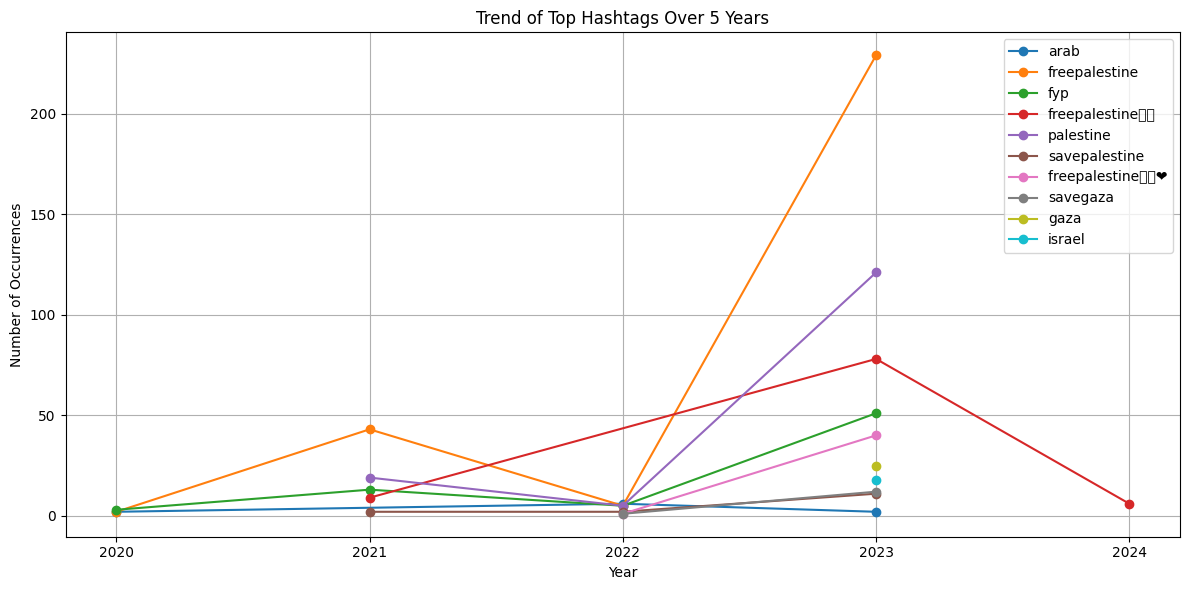

In [17]:
df_P_tiktok['createTimeISO'] = df_P_tiktok['createTimeISO'].apply(shorten_name)

df_P_tiktok['createTimeISO'] = df_P_tiktok['createTimeISO'].astype(int)

df_P_tiktok_sorted = df_P_tiktok.sort_values(by='createTimeISO')

P_tiktok_grouped = df_P_tiktok_sorted.groupby(['createTimeISO', 'hashtags/0/name']).size().reset_index(name='count')

top_P_hashtags = P_tiktok_grouped.groupby('hashtags/0/name')['count'].sum().nlargest(10).index
df_top_P_hashtags = P_tiktok_grouped[P_tiktok_grouped['hashtags/0/name'].isin(top_P_hashtags)]


plt.figure(figsize=(12, 6))
for hashtag in df_top_P_hashtags['hashtags/0/name'].unique():
    plt.plot(df_top_P_hashtags[df_top_P_hashtags['hashtags/0/name'] == hashtag]['createTimeISO'],
             df_top_P_hashtags[df_top_P_hashtags['hashtags/0/name'] == hashtag]['count'],
             marker='o', label=hashtag)

plt.title('Trend of Top Hashtags Over 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.xticks(df_top_P_hashtags['createTimeISO'].unique())  
plt.tight_layout()  
plt.show()

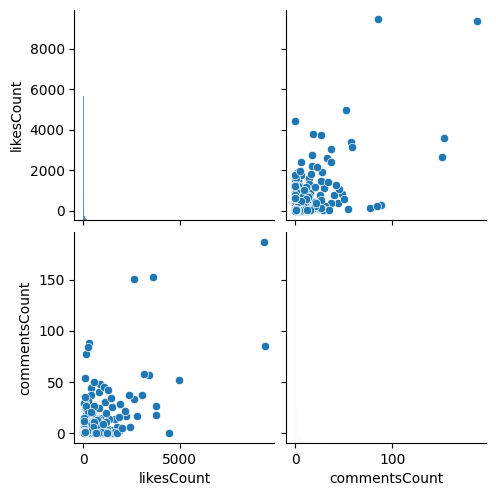

In [18]:
sns.pairplot(data= df_BLM_insta[['likesCount', 'commentsCount']])

In [19]:
(df_BLM_insta[['likesCount', 'commentsCount']]).corr()

,likesCount,commentsCount
likesCount,1.000000,0.649597
commentsCount,0.649597,1.000000


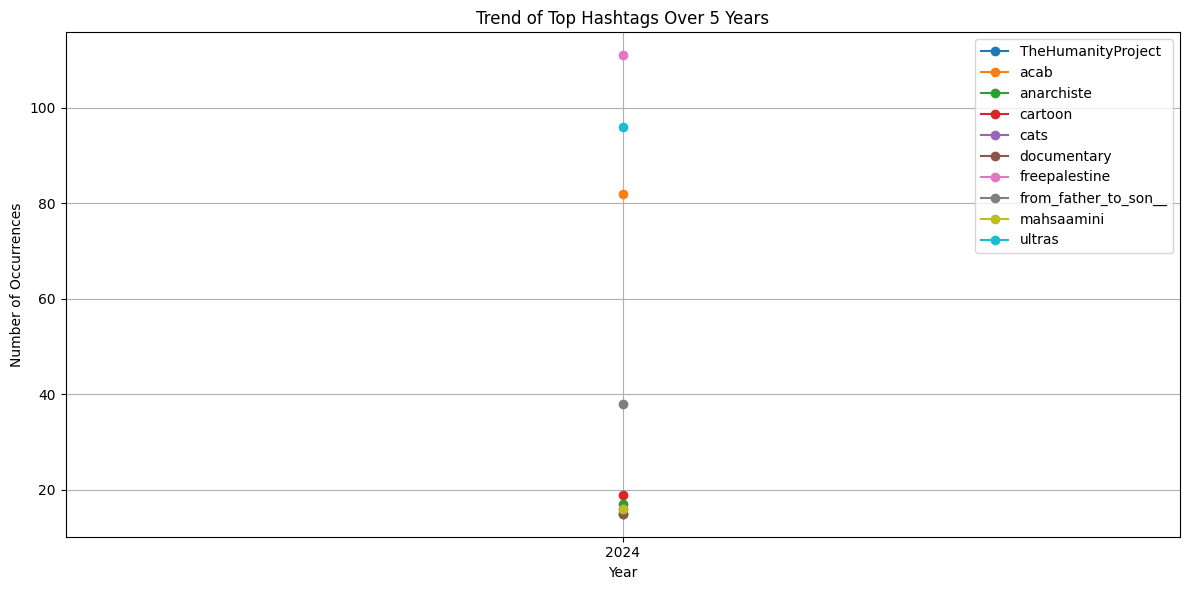

In [20]:
df_BLM_insta['timestamp'] = df_BLM_insta['timestamp'].apply(shorten_name)

BLM_insta_grouped = df_BLM_insta.groupby(['timestamp', 'hashtags/0']).size().reset_index(name='count')

top_BLM_hashtags2 = BLM_insta_grouped.groupby('hashtags/0')['count'].sum().nlargest(10).index
df_top_BLM_hashtags2 = BLM_insta_grouped[BLM_insta_grouped['hashtags/0'].isin(top_BLM_hashtags2)]

plt.figure(figsize=(12, 6))
for hashtag in df_top_BLM_hashtags2['hashtags/0'].unique():
    plt.plot(df_top_BLM_hashtags2[df_top_BLM_hashtags2['hashtags/0'] == hashtag]['timestamp'],
             df_top_BLM_hashtags2[df_top_BLM_hashtags2['hashtags/0'] == hashtag]['count'],
             marker='o', label=hashtag)

plt.title('Trend of Top Hashtags Over 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.xticks(df_top_BLM_hashtags2['timestamp'].unique())  
plt.tight_layout()  
plt.show()

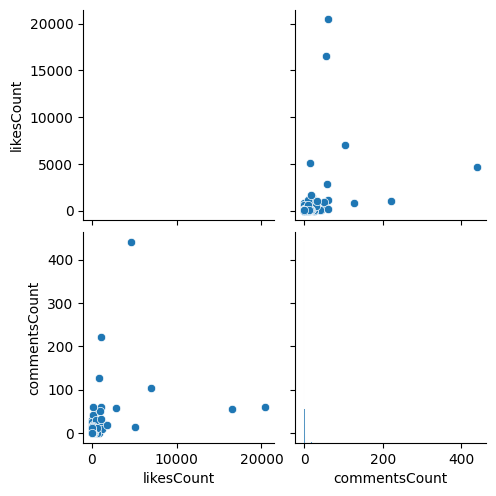

In [21]:
sns.pairplot(data= df_P_insta[['likesCount', 'commentsCount']])

In [22]:
(df_P_insta[['likesCount', 'commentsCount']]).corr()

,likesCount,commentsCount
likesCount,1.000000,0.370472
commentsCount,0.370472,1.000000


C:\Users\sammi\AppData\Local\Temp\ipykernel_49752\1181436749.py:20: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  plt.tight_layout()
C:\Users\sammi\AppData\Local\Temp\ipykernel_49752\1181436749.py:20: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  plt.tight_layout()
C:\Users\sammi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sammi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


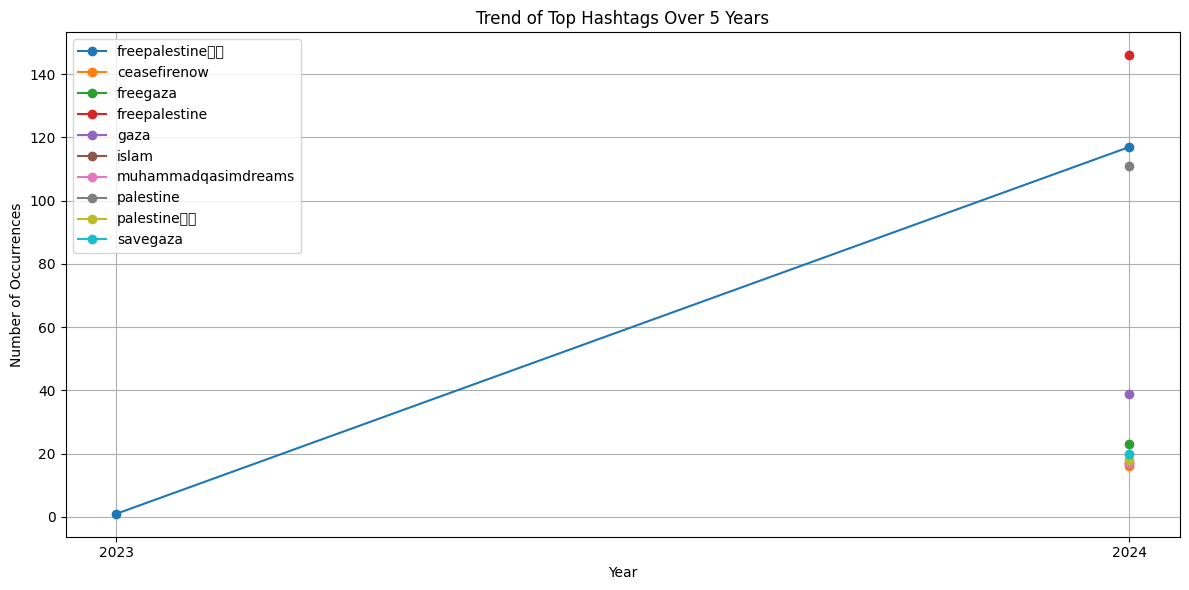

In [23]:
df_P_insta['timestamp'] = df_P_insta['timestamp'].apply(shorten_name)

P_insta_grouped = df_P_insta.groupby(['timestamp', 'hashtags/0']).size().reset_index(name='count')

top_P_hashtags2 = P_insta_grouped.groupby('hashtags/0')['count'].sum().nlargest(10).index
df_top_P_hashtags2 = P_insta_grouped[P_insta_grouped['hashtags/0'].isin(top_P_hashtags2)]

plt.figure(figsize=(12, 6))
for hashtag in df_top_P_hashtags2['hashtags/0'].unique():
    plt.plot(df_top_P_hashtags2[df_top_P_hashtags2['hashtags/0'] == hashtag]['timestamp'],
             df_top_P_hashtags2[df_top_P_hashtags2['hashtags/0'] == hashtag]['count'],
             marker='o', label=hashtag)

plt.title('Trend of Top Hashtags Over 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.xticks(df_top_P_hashtags2['timestamp'].unique())  
plt.tight_layout()  
plt.show()

### Comparing like counts between tiktok and instagram for each cause

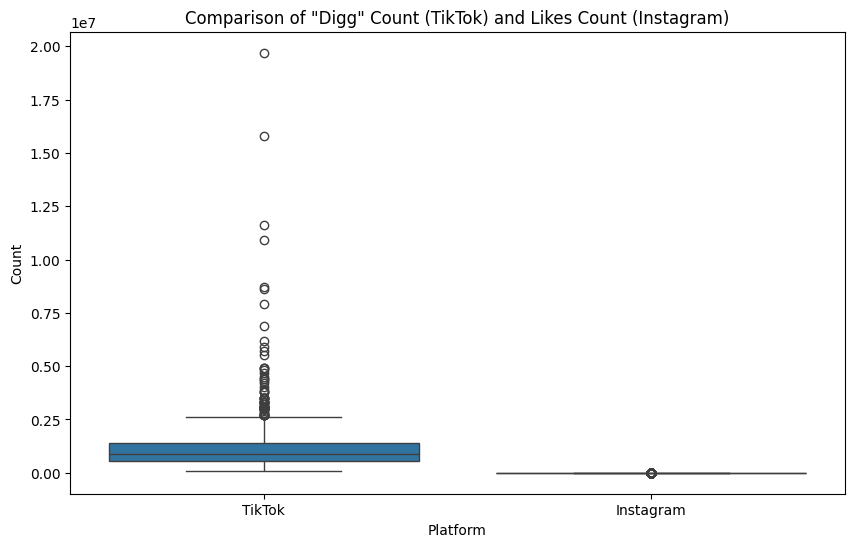

In [31]:
import numpy as np

BLM_data = {'TikTok': df_BLM_tiktok['diggCount'], 'Instagram': df_BLM_insta['likesCount']}
combined_df_BLM = pd.DataFrame(BLM_data)


plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df_BLM)
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Comparison of "Digg" Count (TikTok) and Likes Count (Instagram)')
plt.show()

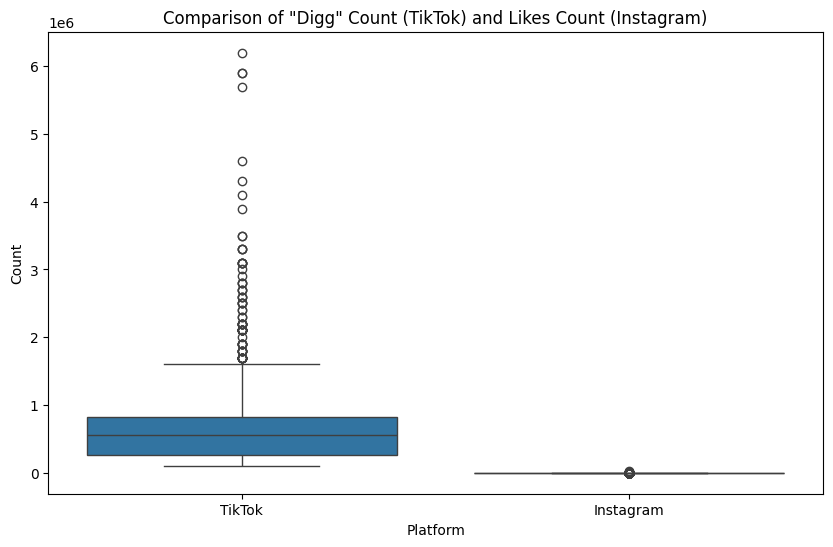

In [32]:
P_data = {'TikTok': df_P_tiktok['diggCount'], 'Instagram': df_P_insta['likesCount']}
combined_df_P = pd.DataFrame(P_data)


plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df_P)
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Comparison of "Digg" Count (TikTok) and Likes Count (Instagram)')
plt.show()